Поставлена задача:
$$\left\{\begin{aligned}
\frac{\partial u}{\partial t} + \frac{2u}{1+u^2}\frac{\partial u}{\partial x}  = 0,\ ~ 0 < x \leq 1\\
u(x,0)= \cos \frac{\pi x}{2} \\
u(0,t) = 1+\frac{1}{2} \arctan t \\ 
\end{aligned}\\
\right. $$

Если привести задачу к дивергентному виду, то первое уравнение будет выглядеть как
$$\frac{\partial u}{\partial t} + \frac{\partial \ln (1+u^2)}{\partial x} = 0$$

Запишем уравнение характеристик:
    $$\frac{dt}{1} = \frac{dx(1+u^2)}{2u}$$
При интегрировании обеих частей получаем:
$$\frac{(1+u^2(x,t))(x-x_0)}{2u}=t-t_0$$
Выделяем два семейства характеристик:
$$t_0 = 0: t=\frac{1+\cos^2\frac{\pi x_0}{2}}{2\cos\frac{\pi x_0}{2}}(x-x_0)$$

$$x_0=0: t= \frac{x(1+(1+\frac{1}{2}arctg~ t_0)^2)}{2+arctg~ t_0}+t_0$$

Подключаем необходимые библиотеки

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [6]:
def f1(x):
    return np.cos(np.pi*x/2)

def f2(t):
    return 1+np.arctan(t)/2

def f(u):
    return np.log(1+u ** 2)

def ch1(x):
    return [((1+f1(x0) ** 2)/(2*f1(x0))*(x-x0)) for x0 in np.arange(0,1.1,0.1)]

def ch2(x):
    return [(x*(1+f2(t0) ** 2)/(2*f2(t0)))+t0 for t0 in np.arange(0,2.1,0.2)]



Заполняем характеристики значениями функций

In [7]:
x_list = np.arange(0,1.1,0.1)

ch1_list = [ch1(x) for x in x_list]
ch2_list = [ch2(x) for x in x_list]


<IPython.core.display.Javascript object>


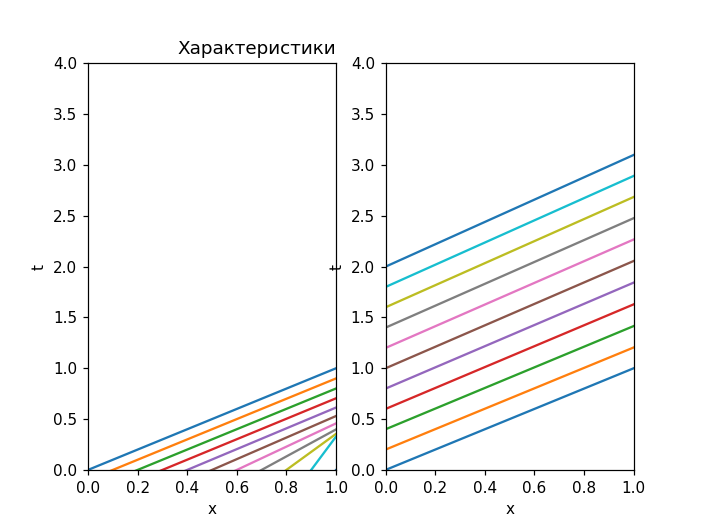

In [8]:
%matplotlib notebook

plt.subplot(1, 2, 1)
plt.ylim(0,4)
plt.xlim(0,1)
plt.plot(x_list, ch1_list) 
plt.title('Характеристики',loc='right')
plt.ylabel('t')
plt.xlabel('x')
plt.subplot(1, 2, 2)
plt.ylim(0,4)
plt.xlim(0,1)
plt.plot(x_list, ch2_list) 
plt.ylabel('t')
plt.xlabel('x')


plt.show()

В рассматриваемом диапазоне $x \in [0;1]$ и $t \in [0;2]$ характеристики не пересекаются.
Теперь введём в этой области разностную сетку с шагом $h$ по координате и $\tau$ по времени:
\begin{eqnarray}
\omega_{h, ~ t}=\begin{cases}
x_n=n\cdot h, ~h=\frac{1}{N}, ~n=\overline{0, N}\\
t_m=m\cdot \tau, ~\tau=\frac{1}{M}, ~m=\overline{0, M}
\end{cases}
\end{eqnarray}
На этой сетке будем рассматривать сеточную функцию $y_n^m=u(x_n, t_m)$. Используем четырёхточечный шаблон, разностный оператор которого $L_{h\tau}$ выглядит так:
$$L_{h\tau}u=\frac{y^{m+1}_n - y^m_{n} + y^{m+1}_{n+1} - y^m_{n+1}}{2h_t} + \frac{ln((y^{m+1}_n)^2+1) - ln((y^{m}_{n})^2+1) + ln((y^{m+1}_{n+1})^2+1) - ln((y^{m}_{n+1})^2+1)}{2h_x}$$

Разностная схема, начальное и граничное условия будут записаны как
$$\left\{\begin{aligned} 
\frac{y^{m+1}_n - y^m_{n} + y^{m+1}_{n+1} - y^m_{n+1}}{2h_t} + \frac{ln((y^{m+1}_n)^2+1) - ln((y^{m}_{n})^2+1) + ln((y^{m+1}_{n+1})^2+1) - ln((y^{m}_{n+1})^2+1)}{2h_x}=0\\
y^0_n= \cos \frac{\pi n h_x}{2}\\
y^{m}_0 = 1+\frac{1}{2}arctg(m\tau) 
\end{aligned}\\
\right. $$

Данная задача при помощи схемы бегущего счёта, позволяющей найти значение $y^{m+1}_{n+1}$, зная значение в узлах $y^{m}_{n}, y^{m}_{n+1}, y^{m+1}_{n}$. Для этого используется итерационный метод Ньютона.
Мы ищем корни уравнения в узлах $y_{mn}:f(y^{mn}) = 0$. Предположим, что нам на шаге $s$ известно приближённое значение $y^{(s)}_{11}$. Обозначим $\Delta y^{(s)}_{11} = y_{11}-y^{(s)}_{11}$. Уравнение принимает вид $f(y^{(s)}_{11}+\Delta y^{(s)}_{11})=0$. Разложение в ряд Тейлора даёт:
$$f(y^{(s)}_{11})+f'(y^{(s)}_{11})\Delta y^{(s)}_{11}=0$$.

Переносим первый член в правую часть и делим на $f'$:
$$y_{11} = y^{(s)}_{11} - \frac{f(y^{(s)}_{11})}{f'(y^{(s)}_{11})} = y^{(s+1)}_{11},$$ т.е. приближение на следующем шаге. Итерации продолжаются до тех пор, пока мы не достигнем интересующей нас точности: $|\Delta y^{(s)}_{11}|<\varepsilon$

In [14]:
epsilon = 0.00001 #эпсилон для метода Ньютона
N = 100; M = 100 #количество точек
T_begin = 0; T_end = 2 #границы по времени
X_begin = 0; X_end = 1 #границы по координате
global h
global t
h=(X_end - X_begin)/(N-1)
t=(T_end - T_begin)/(M-1) #элементарные шаги по пространству и времени

y = np.zeros((M, N)) #двумерный массив MxN, заполненный нулями
y_an = np.zeros((M, N)) #массив для аналитического решения

for n in np.arange(N): #заполняем граничными условиями
        y[0][n] = np.cos(np.pi*n*h/2)        

for m in np.arange(M): #заполняем начальными условиями
        y[m][0] = 1 + 0.5 * np.arctan(m * t)
        
#введём вспомогательные функции для метода Ньютона:
def F(m, n):
    return np.log(1+y[m][n]**2)

def f(mp1, np1):
    n = np1-1
    m = mp1-1
    return (y[mp1][np1]-y[m][n] + y[mp1][n]-y[m][np1])/(2*t) + (F(mp1, np1)-F(mp1,n) + F(m, np1)-F(m,n))/(2*h)
def df(mp1, np1):
    return 1/(2*t) + 2*y[mp1][np1]/(1+y[mp1][np1]**2)/(2*h)

In [15]:
for m in np.arange(M)[0:M-1]: #итерационный метод Ньютона применяется ко всей сетке
    for n in np.arange(N)[0:N-1]:
        eps = epsilon + 1; # > epsilon
        while eps > epsilon:
            ep = f(m+1, n+1) / float(df( m+1, n+1))
            y[m+1][n+1] = y[m+1][n+1] - ep
            eps = abs(ep) 

<IPython.core.display.Javascript object>


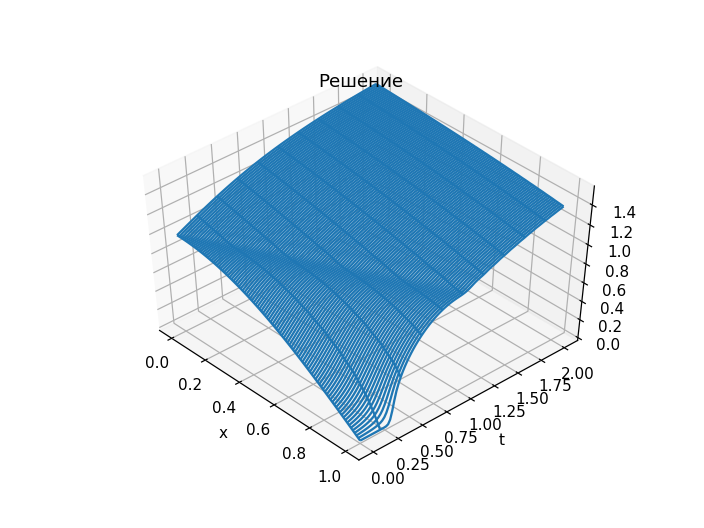

In [16]:
%matplotlib notebook

tm = np.linspace(T_begin,T_end, num=M)
xn = np.linspace(X_begin, X_end, num=N)

X, T = np.meshgrid(xn, tm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, T, y, rstride=10,cstride=1)
plt.title('Решение')
plt.xlabel('x')
plt.ylabel('t')
plt.show()
plt.savefig("100x100.png", dpi = 600)

![50x50](50x50.png "Сетка 50х50 точек")
![100x100](100x100.png "Сетка 100х100 точек")